In [1]:
% matplotlib inline

import datetime
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

google_api_key_file = 'cashflow-e30812754233.json'

cwd = os.getcwd()
print('Current directory: {}'.format(cwd))
if cwd.endswith('/notebooks'):
    # Go one level up to have access to the packages
    os.chdir('../')
    cwd = os.getcwd()
    print('Changed directory to: {}'.format(cwd))

if cwd.endswith('/py'):
    google_api_key_file = '../../cashflow-e30812754233.json'

import expenses.transactions
import utils.excel_sheet as excel_sheet
import utils.google_sheet as google_sheet

days = 120
starting_balance = 3830.79 # As of Sunday 9/30 3:48pm EST

if not os.path.isfile(google_api_key_file):
    raise RuntimeError('File "{}" does not exist.'.format(google_api_key_file))

start_date = datetime.datetime.now()
end_date = start_date + datetime.timedelta(days=days)

# Load the raw transactions from a Google sheet
raw_transactions_df = google_sheet.gspread_load_transactions(
    google_api_file_pathname=google_api_key_file,
    debug=True)

# Process and load the transactions in the cash flow data frame
tx_df = expenses.transactions.load_transactions(
    raw_transactions_df,
    starting_balance=starting_balance,
    days=days)

# Display the data frame
tx_df


Current directory: /Users/brigaldies/Documents/Personal/Budget/tools/cashflow


Retrieve Google API credentials...
Authorizing with Google API credentials...


Reading all records from Google spreadsheet transactions...


Loading records into a data frame...
24 records read.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 8 columns):
item              24 non-null object
enabled           24 non-null object
item_type         24 non-null object
schedule_label    24 non-null object
schedule_type     24 non-null object
schedule_start    24 non-null object
schedule_expr     24 non-null object
amount            24 non-null float64
dtypes: float64(1), object(7)
memory usage: 1.7+ KB
None
Transactions count: 24
Starting balance  : 3830.79
Days in the future: 120
Date interval     : From 2018-09-30 17:56:47.822118 to 2019-01-28 17:56:47.822118


Starting balance: 3830.79
Min balance     : 1057.45
Max balance     : 4386.79
Max average     : 2445.13


,date_ts,item,item_type,amount,balance
date,,,,,
2018-10-01,1.538366e+09,Cell’s phones,debit,140.00,3690.79
2018-10-01,1.538366e+09,IRA T.Rowe Price,debit,100.00,3590.79
2018-10-01,1.538366e+09,Jeremy’s ACAC,credit,65.00,3655.79
2018-10-01,1.538366e+09,Sentra,debit,190.00,3465.79
2018-10-01,1.538366e+09,Spotify,debit,4.00,3461.79
2018-10-03,1.538539e+09,eCL transfer,credit,500.00,3961.79
2018-10-08,1.538971e+09,IRA Vanguard,debit,50.00,3911.79
2018-10-08,1.538971e+09,Utility - Propane,debit,25.00,3886.79
2018-10-10,1.539144e+09,eCL transfer,credit,500.00,4386.79


/Users/brigaldies/Documents/Personal/Budget/tools/cashflow/venv/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Regression coefficients: [[-8.47692102e-05]]


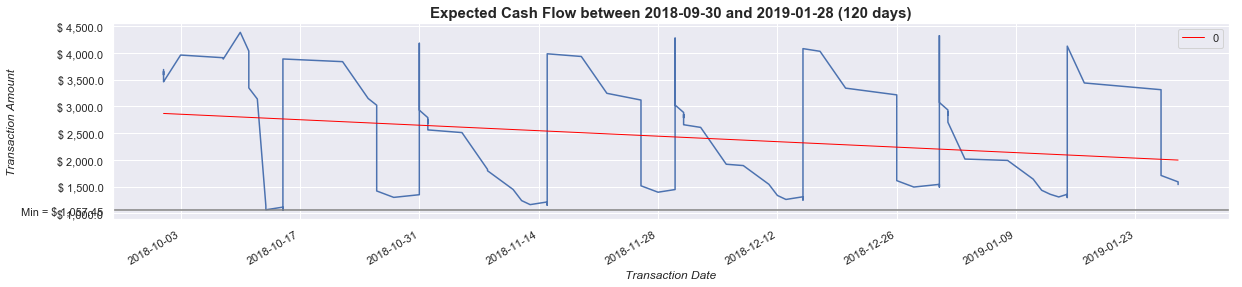

In [2]:
# Reset default params
sns.set()

# Set context
sns.set_context("notebook")

# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(20, 4))

# Extract the time series to plot
ts = tx_df.loc[:, 'balance']

# Display a line chart over a time line
plt.plot(ts[:], '-')
_ = plt.xticks(rotation=45)

# Display the min balance with a horizontal line
min_balance = np.round(np.min(tx_df['balance']), 2)
plt.axhline(min_balance, color="gray")

# Add the min balance ticker
locs = list(ax.get_yticks())
locs += [min_balance]
ax.set_yticklabels(['$ {:,}'.format(loc) if loc != min_balance else 'Min = $ {:,}'.format(loc) for loc in locs])
ax.set_yticks(locs)

# Fit a linear regression line
lr = linear_model.LinearRegression()
lr.fit(X=tx_df.date_ts.values.reshape(-1, 1), y=tx_df['balance'].values.reshape(-1, 1))
prediction_df = pd.DataFrame(lr.predict(tx_df.date_ts.values.reshape(-1, 1)), index=tx_df.index)
print('Regression coefficients: {}'.format(lr.coef_))
if lr.coef_[0][0] < 0:
    reg_line_color = 'red'
else:
    reg_line_color = 'green'
prediction_df.plot(linestyle='-', color=reg_line_color, linewidth=1, ax=ax)

# Set plot title and axis labels
ax.set_title('Expected Cash Flow between {:%Y-%m-%d} and {:%Y-%m-%d} ({} days)'.format(start_date, end_date, days), fontweight='bold', fontsize=15)
ax.set_ylabel("Transaction Amount", fontsize=12, fontstyle='italic')
ax.set_xlabel("Transaction Date", fontsize=12, fontstyle='italic')

pass

In [3]:
# Take it to a Kibana visualization

# Pre-requisite: Load an Elasticsearch + Kibana environment by running docker compose from the command-line:
# > docker-compose up
#
# Before loading the data below, verify that Elasticsearch and Kibana are up and running:
# localhost:9200 ES
# localhost:5601 KB

import utils.search as search

# Connect to ES
es = search.connect()

# (Re-)create an Elastic index
search.create_index(es, "cashflow")
search.index_transactions(es, "cashflow", tx_df)


GET http://localhost:9200/ [status:N/A request:0.003s]
Traceback (most recent call last):
  File "/Users/brigaldies/Documents/Personal/Budget/tools/cashflow/venv/lib/python3.6/site-packages/urllib3/connection.py", line 171, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/Users/brigaldies/Documents/Personal/Budget/tools/cashflow/venv/lib/python3.6/site-packages/urllib3/util/connection.py", line 79, in create_connection
    raise err
  File "/Users/brigaldies/Documents/Personal/Budget/tools/cashflow/venv/lib/python3.6/site-packages/urllib3/util/connection.py", line 69, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 61] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/brigaldies/Documents/Personal/Budget/tools/cashflow/venv/lib/python3.6/site-packages/elasticsearch/connection/http_urllib3.py", line 172, in perform_request
    response = self.

Current directory: /Users/brigaldies/Documents/Personal/Budget/tools/cashflow
Reading config from settings.cfg...
ES_URL=http://localhost:9200
ES_AUTH=None


GET http://localhost:9200/ [status:N/A request:0.003s]
Traceback (most recent call last):
  File "/Users/brigaldies/Documents/Personal/Budget/tools/cashflow/venv/lib/python3.6/site-packages/urllib3/connection.py", line 171, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/Users/brigaldies/Documents/Personal/Budget/tools/cashflow/venv/lib/python3.6/site-packages/urllib3/util/connection.py", line 79, in create_connection
    raise err
  File "/Users/brigaldies/Documents/Personal/Budget/tools/cashflow/venv/lib/python3.6/site-packages/urllib3/util/connection.py", line 69, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 61] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/brigaldies/Documents/Personal/Budget/tools/cashflow/venv/lib/python3.6/site-packages/elasticsearch/connection/http_urllib3.py", line 172, in perform_request
    response = self.

GET http://localhost:9200/ [status:N/A request:0.003s]
Traceback (most recent call last):
  File "/Users/brigaldies/Documents/Personal/Budget/tools/cashflow/venv/lib/python3.6/site-packages/urllib3/connection.py", line 171, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/Users/brigaldies/Documents/Personal/Budget/tools/cashflow/venv/lib/python3.6/site-packages/urllib3/util/connection.py", line 79, in create_connection
    raise err
  File "/Users/brigaldies/Documents/Personal/Budget/tools/cashflow/venv/lib/python3.6/site-packages/urllib3/util/connection.py", line 69, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 61] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/brigaldies/Documents/Personal/Budget/tools/cashflow/venv/lib/python3.6/site-packages/elasticsearch/connection/http_urllib3.py", line 172, in perform_request
    response = self.

GET http://localhost:9200/ [status:N/A request:0.003s]
Traceback (most recent call last):
  File "/Users/brigaldies/Documents/Personal/Budget/tools/cashflow/venv/lib/python3.6/site-packages/urllib3/connection.py", line 171, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/Users/brigaldies/Documents/Personal/Budget/tools/cashflow/venv/lib/python3.6/site-packages/urllib3/util/connection.py", line 79, in create_connection
    raise err
  File "/Users/brigaldies/Documents/Personal/Budget/tools/cashflow/venv/lib/python3.6/site-packages/urllib3/util/connection.py", line 69, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 61] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/brigaldies/Documents/Personal/Budget/tools/cashflow/venv/lib/python3.6/site-packages/elasticsearch/connection/http_urllib3.py", line 172, in perform_request
    response = self.

ConnectionError: ConnectionError(<urllib3.connection.HTTPConnection object at 0x1207d13c8>: Failed to establish a new connection: [Errno 61] Connection refused) caused by: NewConnectionError(<urllib3.connection.HTTPConnection object at 0x1207d13c8>: Failed to establish a new connection: [Errno 61] Connection refused)